# Results of Edge Detection Benchmark and Speedup

By: Jessica Parks

## Serial Experiment

I compiled the serial code on a MacBook Pro, 1.4 GHz Quad-Core Intel Core i5, 8 GB memory using the following commands:

```
module purge
module load GCC/11.2.0 libpng/1.6.37
```

In ran the code 100 times on my Macbook pro and obtained the following results

## Code Optimization

As suggested, I used different levelso of compiler optimization and changed the order of the loops (switching rows and columns). These did not turn out as expected but this is discussed more below in the conclusion.<br/> <br/>

**Changes made:**

* Change the rows and columns
* Try different optimization levels

In [1]:
#Adapted from: https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged
import matplotlib.pyplot as plt
import numpy as np

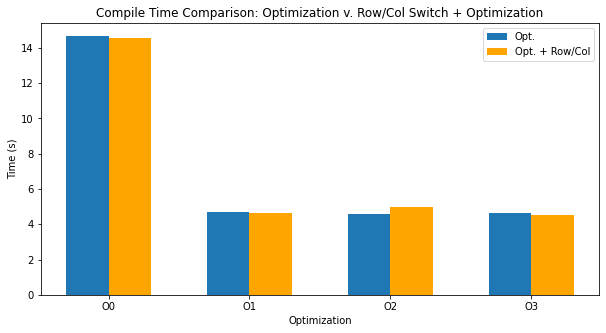

In [2]:
# regular optimization
opt_names = ['-O', '-O1', '-O2', '-O3']
opt_names_times = [14.67, 4.68, 4.58, 4.61]

# optimization with row/col change
row_col = ['-O', '-O1', '-O2', '-O3']
row_col_times = [14.53, 4.65, 4.98, 4.53]

# number of bars
# and position on axis
ind = np.arange(4)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, opt_names_times , width, label='Opt.')
plt.bar(ind + width, row_col_times, width, label='Opt. + Row/Col', color = 'orange')

plt.xlabel('Optimization')
plt.ylabel('Time (s)')
plt.title('Compile Time Comparison: Optimization v. Row/Col Switch + Optimization')

plt.xticks(ind + width / 2, ('O0', 'O1', 'O2', 'O3'))
plt.legend(loc='best')
plt.show()

## OpenMP Speedup

**Changes made:**

* Change number of threads
* Changed Optimization levels
* Kept traversal by rows and not columns

In [3]:
# optimization with row/col change
omp = ['-O', '-O1', '-O2', '-O3']
omp_times = [6.66, 2.92, 3.05, 3.00]

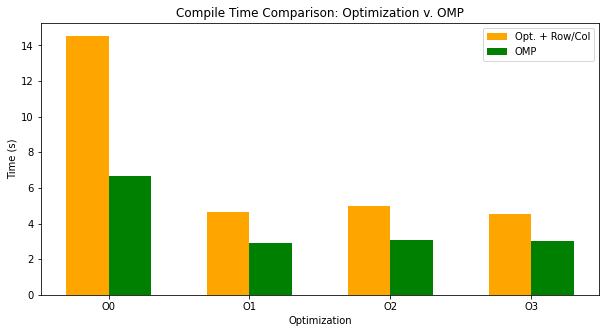

In [4]:
ind = np.arange(4)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, row_col_times , width, label='Opt. + Row/Col', color = 'orange')
plt.bar(ind + width, omp_times, width, label='OMP', color='green')

plt.xlabel('Optimization')
plt.ylabel('Time (s)')
plt.title('Compile Time Comparison: Optimization v. OMP')

plt.xticks(ind + width / 2, ('O0', 'O1', 'O2', 'O3'))
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'Different NUM_THREADS')

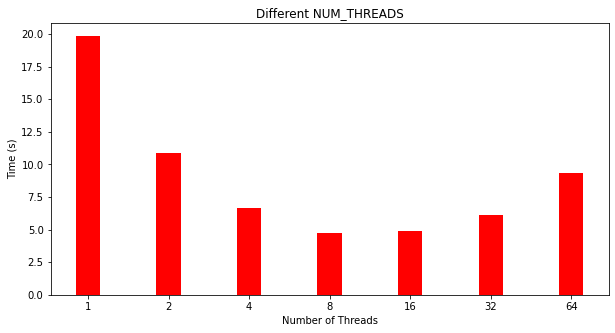

In [5]:
num_threads = [1,2,4,32,64]
num_threads_time = [19.85, 10.85, 6.66, 4.76, 4.93, 6.11, 9.337]

ind = np.arange(7)
# Figure size
plt.figure(figsize=(10,5))
# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, num_threads_time, width, color = 'red')
plt.xticks(ind, ('1', '2', '4', '8', '16', '32', '64'))
plt.xlabel('Number of Threads')
plt.ylabel('Time (s)')
plt.title('Different NUM_THREADS')

## Concluding Discussion

Through conversations at office hours, I learned the default optimization is -O0. In a very general sense, -O1 and -O0 often see similar results and amounts of times. For -O2 and -O3, there is often a difference in time between these levels and the more basic ones. In fact, sometimes -O2 can be faster then -O3 depending on the code.<br/> <br/>

Additionally, through conversations at office hours and online research, I found traversing by rows across a matrix rather than columns should ideally be faster. This is due to a 2x2 matrix being stored as a 1x1 array; the rows are essentially laid next to each other. Therefore, if you are moving to values around a certain data point, in our 1x1 array you would move one spot to the left/right if you wanted to move one to the left/right in a 2x2 matrix. If you wanted to move one up/down in our 2x2 array, then you would need to move many values to the left/right (hypothetically +/- the number of columns present in the matrix) to reach that value above or below our data point. Therefore, moving through rows and not columns reduces the amount of time it takes to traverse the data. While we did not really see a difference this time, even as I changed the iteration times, next time I could make the iteration number much larger if I have a more powerful computer. <br/> <br/>

Shifting to observations with OpenMP, we see there is a difference in compilation time when using it compared to whe we compiled without using it. Looking at the graph above, we can see regardless of the compiler optimization, we have a decrease in compilation time. This helps us see how parallelization can improve the time compared to when we do not use parallelization of our code. <br/> <br/>

What is also helpful though is choosing an appropriate amount of threads to optimize the OpenMP code even more. Seen in the red graph above, it is important to choose a reasonable thread count. When we chose a very low thread amount, like 1 or 2, we see there is still a large compiler time. This is probably due to us not optimizing all the threads on our processor so the thread(s) has more computations. When we do choose a good thread value, like 8 or 16, it allows us to utilize many of the threads on our processor without having too many threads that could conflict in the cache. We see that as we increase the number of threads, the time does not necessarily continue to decrease. When we have too many threads, it takes longer to compile due to this potential cache issue.